In [2]:
# Importando as bibliotecas necessárias
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Carregando o dataset
data = fetch_covtype()
X = data.data
y = data.target

# Verificando o formato dos dados
print("Formato de X (atributos):", X.shape)
print("Formato de y (rótulos):", y.shape)

Formato de X (atributos): (581012, 54)
Formato de y (rótulos): (581012,)


In [4]:
# Dividindo os dados entre treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando as dimensões dos dados divididos
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)


Tamanho de X_train: (464809, 54)
Tamanho de X_test: (116203, 54)
Tamanho de y_train: (464809,)
Tamanho de y_test: (116203,)


In [9]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicando PCA para reduzir a dimensionalidade (ex: 95% da variância explicada)
pca = PCA(n_components=0.95)  # mantém 95% da variância
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)


In [8]:
# Treinando o modelo Naybe Bayes e fazendo predições
from sklearn.naive_bayes import GaussianNB

# Criando o classificador Naive Bayes
nb_model = GaussianNB()

# Treinando o modelo com os dados de treino normalizados
nb_model.fit(X_train_scaled, y_train)

# Fazendo previsões com os dados de teste normalizados
y_pred = nb_model.predict(X_test_scaled)

# Mostrando uma amostra das previsões
print("Exemplos de previsões:", y_pred[:10])


Exemplos de previsões: [7 2 3 1 5 4 5 7 7 5]


Acurácia: 0.4569
Precisão: 0.6427
Recall: 0.4569


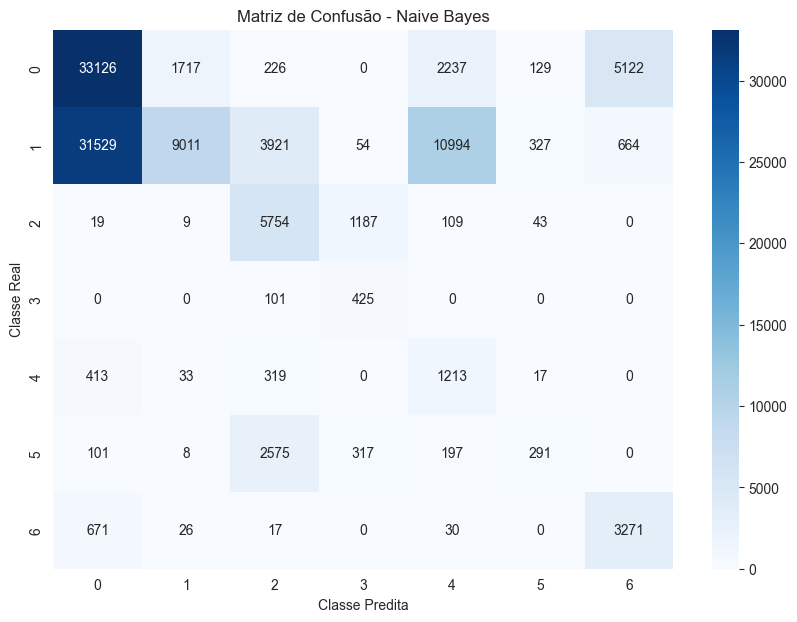


Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.50      0.78      0.61     42557
           2       0.83      0.16      0.27     56500
           3       0.45      0.81      0.57      7121
           4       0.21      0.81      0.34       526
           5       0.08      0.61      0.14      1995
           6       0.36      0.08      0.14      3489
           7       0.36      0.81      0.50      4015

    accuracy                           0.46    116203
   macro avg       0.40      0.58      0.37    116203
weighted avg       0.64      0.46      0.41    116203



In [6]:
# Avaliando o desempenho do modelo Naive Bayes

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # multiclasses
recall = recall_score(y_test, y_pred, average='weighted')

print("Acurácia:", round(accuracy, 4))
print("Precisão:", round(precision, 4))
print("Recall:", round(recall, 4))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibindo matriz de confusão com seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()

# Relatório completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
